In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
import math
import meep as mp
from meep import mpb

num_bands = 8
resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(y=0.5),          # M
    mp.Vector3(1 / -3, 1 / 3),  # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)
ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.004171609878540039
Outputting epsilon.h5...
elapsed time for k point: 0.0905911922454834
elapsed time for k point: 0.055701494216918945
elapsed time for k point: 0.045659542083740234
elapsed t

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.00611114501953125
Outputting epsilon.h5...
elapsed time for k point: 0.10001444816589355
elapsed time for k point: 0.05996417999267578
elapsed time for k point: 0.05382895469665527
elapsed tim

NameError: name 'converted_eps' is not defined

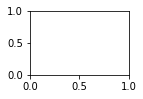

In [5]:
efields = []
def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.axis('off')

plt.show()

(-0.5, 191.5, 165.5, -0.5)

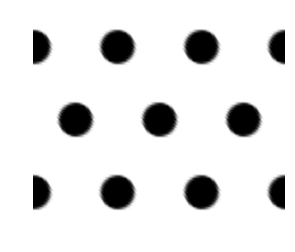

In [6]:
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')

In [9]:
ef = ms.get_efield(1, bloch_phase=True)

In [11]:
ef.shape

(32, 32, 1, 3)

In [12]:
efields = []
def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)




Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.007373332977294922
Outputting epsilon.h5...
elapsed time for k point: 0.11075496673583984
elapsed time for k point: 0.05318808555603027
elapsed time for k point: 0.04919695854187012
elapsed ti

In [20]:
efields[0].shape

(32, 32, 1, 3)

In [27]:
print(converted[0].shape)

(96, 83, 96)
